2018 Edition

# Challenge: What is the future selling price of a home?

A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring homeowners have a trusted way to monitor this asset is incredibly important.

In this competition, students are required to develop a full-fledged approach to make predictions about the future sale prices of homes. A full-fledged approach constist, at least, in the following steps:

* Descriptive statistics about the data
* Data cleaning and pre-processing
* Defining a modeling approach to the problem
* Build such a statistical model
* Validate the outcome of the model

Now, should you ask a home buyer to describe their dream house, they probably wouldn't begin with describing features such as the height of the basement ceiling or the proximity to a railroad. As you will see, the dataset we use in this competition proves that many more features influence price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in a small city in the US, this competition challenges you to predict the final price of each home.

In [23]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
from ipyleaflet import (
    Map,
    Marker,
    TileLayer, ImageOverlay,
    Polyline, Polygon, Rectangle, Circle, CircleMarker,
    GeoJSON, DrawControl, LayerGroup, basemaps
)

import geocoder
import pandas as pd
challenge_data_folder = "challenge_data"
trainData = pd.read_csv(challenge_data_folder+'/train.csv')

In [24]:
trainData.Neighborhood.head()

0    CollgCr
1    Veenker
2    CollgCr
3    Crawfor
4    NoRidge
Name: Neighborhood, dtype: object

In [25]:
maxSalingPrice = np.max(trainData.SalePrice)
minSalingPrice = np.min(trainData.SalePrice)

In [26]:
dataDescript = open(challenge_data_folder+"/Data description.rtf").readlines()

## Descriptive statistics about the Data

In [27]:
#Neighborhood 89
#NextCategory 117
dicStreetName = {}
dicStreetLoc = {}
dicStreetPirceArea = {}
for index in range(92,117):
    line = dataDescript[index]
    line = line.strip()
    line = line.split('\t')
    dicStreetName[line[0]]= line[1][:-1]
    dicStreetLoc[line[0]] = geocoder.google(line[1][:-1]+', Ames')
    dicStreetPirceArea[line[0]]=[0,0,0]

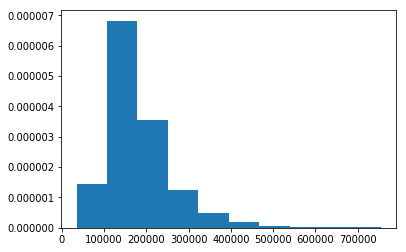

In [28]:
hist = plt.hist(trainData.SalePrice,normed=True)

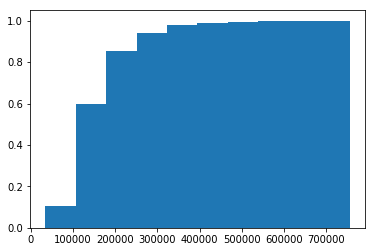

In [29]:
hist = plt.hist(trainData.SalePrice,cumulative=True,normed=True)
plt.show()
hist = np.array(hist[:-1]) #keep values of histogramm to change color markers
dicSaleValue = []
for i in range(len(hist[0])):
    dicSaleValue.append((hist[0][i],hist[1][i]))

cmapRdYlGn = cm.get_cmap('RdYlGn')
markersList=[]
def placeMarker(row):
    neighborhood = row.Neighborhood
    coordGeo = dicStreetLoc[neighborhood]
    if (coordGeo.lat,coordGeo.lng) ==(None,None):pass
    if(coordGeo==(None,None)): print('Test')
    
    try:
        lastLowerValuesIndex = list(map(lambda x: x[1]<= row.SalePrice,dicSaleValue)).index(False)-1
    except ValueError:
        lastLowerValuesIndex = len(dicSaleValue)-1
    colorfloat = dicSaleValue[lastLowerValuesIndex][0]
    #print(colorfloat,cmapRdYlGn(1-colorfloat)) 
    markerColor = colors.rgb2hex(cmapRdYlGn(1-colorfloat))#green to red
    marker = CircleMarker(location=(coordGeo.lat, coordGeo.lng), radius=10, color=markerColor, fill_color=markerColor)
    markersList.append(marker)
trainData.apply(placeMarker,axis=1)

In [30]:
cmapRdYlGn = cm.get_cmap('RdYlGn')
markersList=[]
def calcAreaPrice(row):
    neighborhood = row.Neighborhood
    dicStreetPirceArea[neighborhood][0]+=row.SalePrice
    dicStreetPirceArea[neighborhood][1]+=row.LotArea
trainData.apply(calcAreaPrice,axis=1)

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
1170    None
1171    None
1172    None
1173    None
1174    None
1175    None
1176    None
1177    None
1178    None
1179    None
1180    None
1181    None
1182    None
1183    None
1184    None
1185    None
1186    None
1187    None
1188    None
1189    None
1190    None
1191    None
1192    None
1193    None
1194    None
1195    None
1196    None
1197    None
1198    None
1199    None
Length: 1200, dtype: object

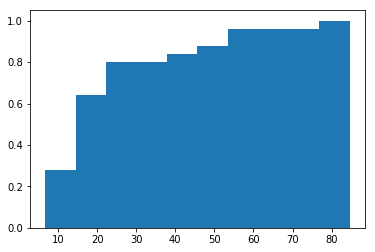

In [31]:
maxAreaPrice = -np.inf
minAreaPrice = np.inf
markersList = []
areaPrices = []
for place in dicStreetPirceArea:
    areaPrice = dicStreetPirceArea[place][0]/dicStreetPirceArea[place][1]
    dicStreetPirceArea[place][2] = areaPrice
    areaPrices.append(areaPrice)
    maxAreaPrice = max(maxAreaPrice,areaPrice)
    minAreaPrice = min(minAreaPrice,areaPrice)
hist = plt.hist(areaPrices,cumulative=True,normed=True)
plt.show()

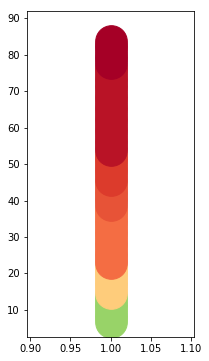

In [48]:
plt.figure(figsize=(3,6))
for areaPrice in np.arange(minAreaPrice,maxAreaPrice,1):
    try:
        lastLowerValuesIndex = list(map(lambda x: x<= areaPrice,hist[1])).index(False)-1
    except ValueError:
        lastLowerValuesIndex = len(hist[0])-1
    #print(lastLowerValuesIndex)
    colorfloat = hist[0][lastLowerValuesIndex] #Use the cumulative hist to get the color
    plt.scatter(1,areaPrice,c = cmapRdYlGn(1-colorfloat),s=1000)
    
plt.show()

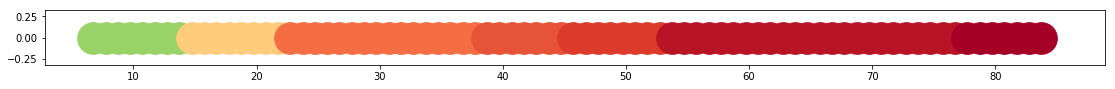

Area Price around Ames


In [53]:
plt.figure(figsize=(19,1))
for areaPrice in np.arange(minAreaPrice,maxAreaPrice,1):
    try:
        lastLowerValuesIndex = list(map(lambda x: x<= areaPrice,hist[1])).index(False)-1
    except ValueError:
        lastLowerValuesIndex = len(hist[0])-1
    #print(lastLowerValuesIndex)
    colorfloat = hist[0][lastLowerValuesIndex] #Use the cumulative hist to get the color
    plt.scatter(areaPrice,0,c = cmapRdYlGn(1-colorfloat),s=1000)
    
plt.show()
for place in dicStreetPirceArea:
    coordGeo = dicStreetLoc[place]
    areaPrice = dicStreetPirceArea[place][2]
    try:
        lastLowerValuesIndex = list(map(lambda x: x<= areaPrice,hist[1])).index(False)-1
    except ValueError:
        lastLowerValuesIndex = len(hist[0])-1
    #print(lastLowerValuesIndex)
    colorfloat = hist[0][lastLowerValuesIndex] #Use the cumulative hist to get the color
    #colorfloat = (-minAreaPrice)/(maxAreaPrice-minAreaPrice)

    #print(dicStreetPirceArea[place][2],colorfloat)
    markerColor = colors.rgb2hex(cmapRdYlGn(1-colorfloat))#green to red
    marker = CircleMarker(location=(coordGeo.lat, coordGeo.lng), radius=10, color=markerColor, fill_color=markerColor)
    markersList.append(marker)

g = geocoder.google('Ames')
m = Map(center=[g.lat, g.lng], zoom=13)

markersList = [x for x in markersList if x!=None]
group = LayerGroup(layers=markersList)

m.add_layer(group)
print("Area Price around Ames")
m.

<div class="alert alert-warning">
<h3> Comments</h3>

<li>Lower price further from downtown.
<li>Noticeable differences of price in the same area like along lincoln Way --> More parameters to take into account.
</div>

## Preprocessing the data

In [34]:
dataSchema = trainData.columns
for columns in dataSchema:
    columnVals = trainData[columns]
    for vals in columnVals:
        if vals=='nan':
            print(columns,vals)

# The dataset

## File descriptions

* train.csv - the training dataset
* test.csv - the test dataset
* data_description.txt - full description of each column

## Data fields
Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value (in dollars) of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale


# Goal of the challenge

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

## Metric
Notebooks are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

## Submission File Format
The file should contain a header and have the following format:

```
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.
```

You will find an example submission file within the data directory in the repository.

# Grading the notebook

This challenge is going to be graded as a regular notebook for the AML labs. As a consequence, students should submit:

* the html version of the notebook, using the Data Science Labs submission website, as usual [**Assignement: Challenge Notebook**]
* the submission file (in csv format), that we will use to rank students according to the metric defined above, again through the Data Science Labs submission website [**Assignement: Challenge Predictions**]

In summary, you will have to submit 2 files!